In [47]:
import sys,os
sys.path.append('../')
from deep_rl import *
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm
import random
import numpy as np
import pickle

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
with open('../storage/5b-main-generalization-all-baselines.p', 'rb') as f:
    rewards1 = pickle.load(f)

with open('../storage/09-rewards-0.9eps.p', 'rb') as f:
    rewards2 = pickle.load(f)

In [52]:
def plot_rewards(rewards, plot_seperate=True , clip=50000, title='unnamed'):
    smooth = 5000
    
    colors = ['red', 'blue', 'green', 'm', 'k', 'y', '#ec7603', '#34495e', '#999999']
    
    plt.figure(figsize=(18,6), dpi=200)
    if(plot_seperate):
        for k, v in rewards.items():
            for t, r in zip(v[0], v[1]):
#                 plt.plot(t, r, label=k)
                plt.plot(convolve(np.interp(np.arange(clip), t, r), smooth),label=k)
        plt.legend(), plt.show()
        return
    
    for j, (k, v) in enumerate(rewards.items()):
        r_vec = np.zeros((len(v[0]), clip-smooth+1))
        for i, (t, r) in enumerate(zip(v[0], v[1])):
            r_vec[i,:] = convolve(np.interp(np.arange(clip), t, r), smooth)
    
        mean = np.mean(np.array(r_vec), axis=0)
        std = np.std(np.array(r_vec), axis=0)
        plt.plot(mean, label=k, color=colors[j])
        plt.fill_between(np.arange(0, len(mean)), mean+std, mean-std, facecolor=colors[j], alpha=0.3)
    
    plt.xlabel('timesteps'), plt.ylabel('episodic returns')
    plt.title(title)
    plt.legend(loc='lower right'), plt.show()

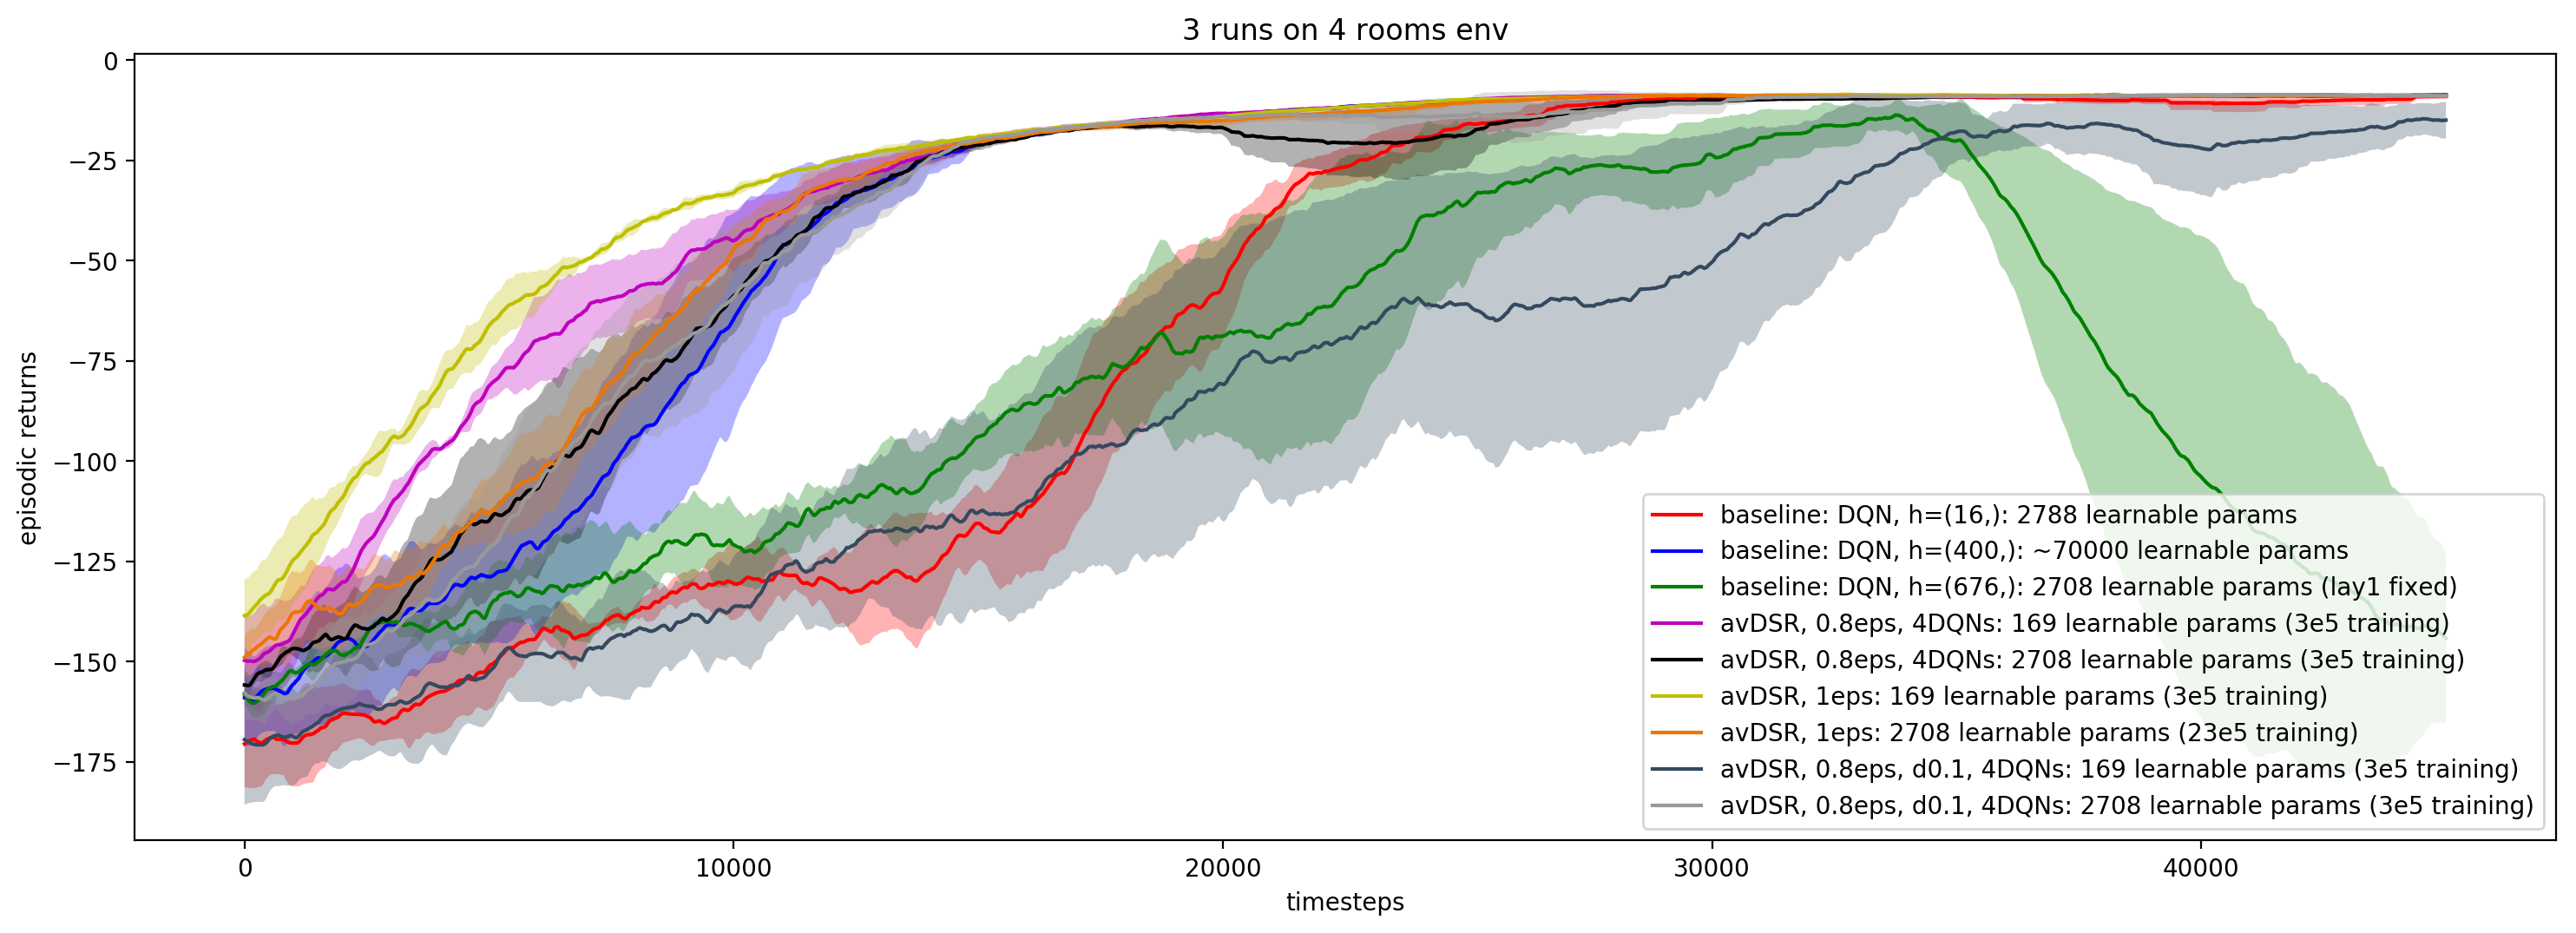

In [53]:
plot_rewards({**rewards1,**rewards2}, plot_seperate=False, title='3 runs on 4 rooms env')
# plot_rewards(rewards2, plot_seperate=True, title='3 runs on 4 rooms env')

In [34]:
# k = rewards2['avDSR, 0.9eps, 4DQNs: 169 learnable params (3e5 training)'][0][0,3],rewards2['avDSR, 0.9eps, 4DQNs: 169 learnable params (3e5 training)'][1][0,3]
# m = {'test': k}

TypeError: list indices must be integers or slices, not tuple